# Stock Market Portfolio Optimization with Python

In [14]:
import pandas as pd 
import numpy as np
import yfinance as yf
from datetime import date , timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Define the time period for the data (one year)
end_date = date.today().strftime("%Y-%m-%d") #end date is today
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d") #start date is one year ago to present date

In [3]:
# list of stock tickers to download
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

In [4]:
#Download the historic stock data
data = yf.download(tickers, start=start_date, end=end_date, progress=False)

In [5]:
#Display the downloaded data
data

Price             Close                                                High  \
Ticker      HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS   
Date                                                                          
2024-01-01  1675.223999  1512.393677  1290.744263  3748.278076  1686.125187   
2024-01-02  1676.210571  1495.869385  1301.432983  3720.837402  1679.860799   
2024-01-03  1650.363525  1452.584351  1287.281006  3630.895264  1681.735059   
2024-01-04  1668.071777  1474.714233  1293.933350  3606.356201  1672.116520   
2024-01-05  1659.538208  1494.065796  1299.439697  3676.284180  1681.932477   
...                 ...          ...          ...          ...          ...   
2024-12-23  1801.000000  1924.300049  1222.300049  4158.299805  1806.000000   
2024-12-24  1798.099976  1909.050049  1222.750000  4179.500000  1808.699951   
2024-12-26  1790.750000  1907.400024  1216.550049  4169.100098  1812.000000   
2024-12-27  1798.250000  1916.750000  1221.050049  4164.850098  1805.949951   
2024-12-30  1777.900024  1906.000000  1210.699951  4158.799805  1815.000000   

Price                                                      Low               \
Ticker          INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS      INFY.NS   
Date                                                                          
2024-01-01  1517.901822  1299.016237  3768.833465  1669.206199  1496.697991   
2024-01-02  1510.248994  1303.077427  3748.277641  1665.950651  1484.755629   
2024-01-03  1481.782223  1312.545235  3709.674993  1646.466666  1450.634573   
2024-01-04  1481.587247  1300.511122  3657.695684  1648.193203  1455.411507   
2024-01-05  1501.036155  1305.494222  3685.971908  1645.628180  1468.426174   
...                 ...          ...          ...          ...          ...   
2024-12-23  1940.000000  1227.199951  4217.000000  1781.300049  1909.000000   
2024-12-24  1942.000000  1233.550049  4218.000000  1789.550049  1840.000000   
2024-12-26  1919.750000  1227.699951  4199.950195  1780.750000  1902.300049   
2024-12-27  1924.150024  1227.900024  4180.950195  1789.099976  1903.900024   
2024-12-30  1916.000000  1223.199951  4199.299805  1771.000000  1886.500000   

Price                                        Open                            \
Ticker      RELIANCE.NS       TCS.NS  HDFCBANK.NS      INFY.NS  RELIANCE.NS   
Date                                                                          
2024-01-01  1282.223134  3710.806019  1683.017598  1500.353824  1285.910692   
2024-01-02  1282.148458  3705.150371  1675.914685  1507.178071  1288.128164   
2024-01-03  1284.241274  3626.272786  1679.071480  1481.782223  1300.585825   
2024-01-04  1285.188128  3590.816602  1655.394910  1467.158845  1289.623028   
2024-01-05  1294.606127  3614.273691  1664.421596  1468.913619  1297.047791   
...                 ...          ...          ...          ...          ...   
2024-12-23  1213.199951  4114.899902  1782.000000  1930.050049  1215.000000   
2024-12-24  1221.000000  4158.299805  1802.050049  1927.050049  1222.300049   
2024-12-26  1214.250000  4143.149902  1798.550049  1909.050049  1224.250000   
2024-12-27  1217.000000  4147.250000  1794.800049  1909.400024  1218.300049   
2024-12-30  1208.099976  4112.000000  1792.199951  1915.699951  1216.400024   

Price                        Volume                                
Ticker           TCS.NS HDFCBANK.NS  INFY.NS RELIANCE.NS   TCS.NS  
Date                                                               
2024-01-01  3727.525792     7119843  2808451     4030540   825907  
2024-01-02  3748.277641    14621046  5396313     7448800  1344068  
2024-01-03  3704.904844    14194881  7550363     9037536  1803075  
2024-01-04  3640.730034    13367028  7056038     9612778  3598144  
2024-01-05  3614.421122    15944735  8895403     8086406  1963127  
...                 ...         ...      ...         ...      ...  
2024-12-23  4200.049805     5522296  2781793    10052824  2195338  

In [6]:
#Reset index to bring Date into the columns
data = data.reset_index()

In [7]:
#Melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in data.columns.values]
data_melted = data.melt(id_vars=['Date'], var_name='Attribute_Ticker', value_name='Value')
data_melted[['Attribute', 'Ticker']] = data_melted['Attribute_Ticker'].str.split(' ', expand=True, n=1)
data_melted = data_melted.drop(columns=['Attribute_Ticker'])
print(data_melted.head())

        Date        Value Attribute       Ticker
0 2024-01-01  1675.223999     Close  HDFCBANK.NS
1 2024-01-02  1676.210571     Close  HDFCBANK.NS
2 2024-01-03  1650.363525     Close  HDFCBANK.NS
3 2024-01-04  1668.071777     Close  HDFCBANK.NS
4 2024-01-05  1659.538208     Close  HDFCBANK.NS


In [11]:
# Pivot the melted DataFrame to have the attributes as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='Value', aggfunc='first')

In [13]:
# Reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()
print(stock_data)

Attribute       Date       Ticker        Close         High          Low  \
0         2024-01-01  HDFCBANK.NS  1675.223999  1686.125187  1669.206199   
1         2024-01-01      INFY.NS  1512.393677  1517.901822  1496.697991   
2         2024-01-01  RELIANCE.NS  1290.744263  1299.016237  1282.223134   
3         2024-01-01       TCS.NS  3748.278076  3768.833465  3710.806019   
4         2024-01-02  HDFCBANK.NS  1676.210571  1679.860799  1665.950651   
..               ...          ...          ...          ...          ...   
975       2024-12-27       TCS.NS  4164.850098  4180.950195  4147.250000   
976       2024-12-30  HDFCBANK.NS  1777.900024  1815.000000  1771.000000   
977       2024-12-30      INFY.NS  1906.000000  1916.000000  1886.500000   
978       2024-12-30  RELIANCE.NS  1210.699951  1223.199951  1208.099976   
979       2024-12-30       TCS.NS  4158.799805  4199.299805  4112.000000   

Attribute         Open      Volume  
0          1683.017598   7119843.0  
1          15

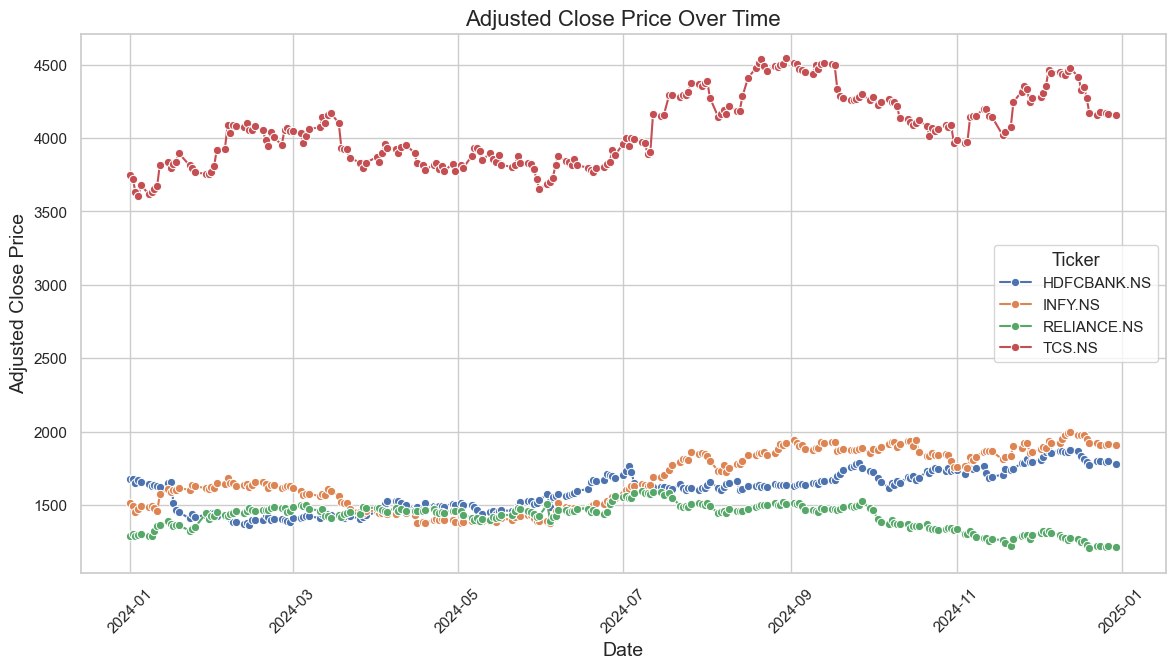

In [23]:
#Plot to visualize
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [25]:
stock_data.rename(columns={'YourDateColumnName': 'Date'}, inplace=True)


In [26]:
print(stock_data.head())  

Attribute        Ticker        Close         High          Low         Open  \
Date                                                                          
2024-01-01  HDFCBANK.NS  1675.223999  1686.125187  1669.206199  1683.017598   
2024-01-01      INFY.NS  1512.393677  1517.901822  1496.697991  1500.353824   
2024-01-01  RELIANCE.NS  1290.744263  1299.016237  1282.223134  1285.910692   
2024-01-01       TCS.NS  3748.278076  3768.833465  3710.806019  3727.525792   
2024-01-02  HDFCBANK.NS  1676.210571  1679.860799  1665.950651  1675.914685   

Attribute       Volume  
Date                    
2024-01-01   7119843.0  
2024-01-01   2808451.0  
2024-01-01   4030540.0  
2024-01-01    825907.0  
2024-01-02  14621046.0  


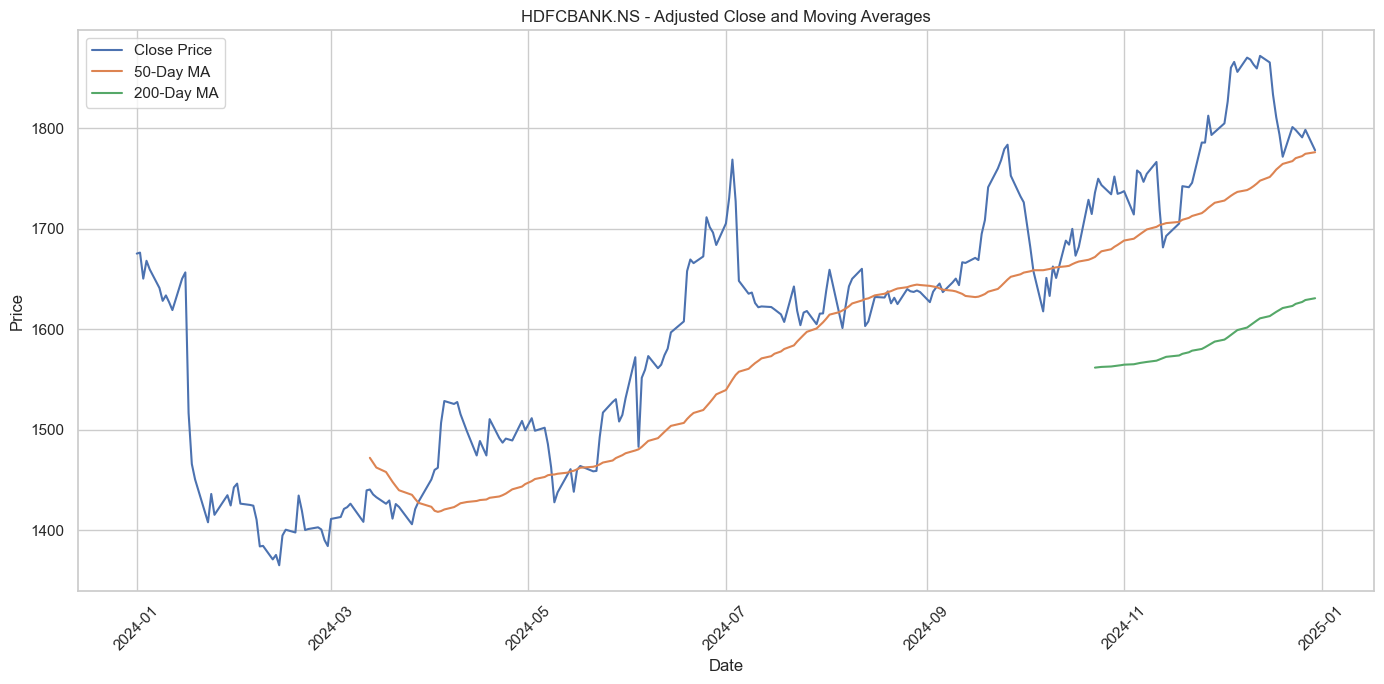

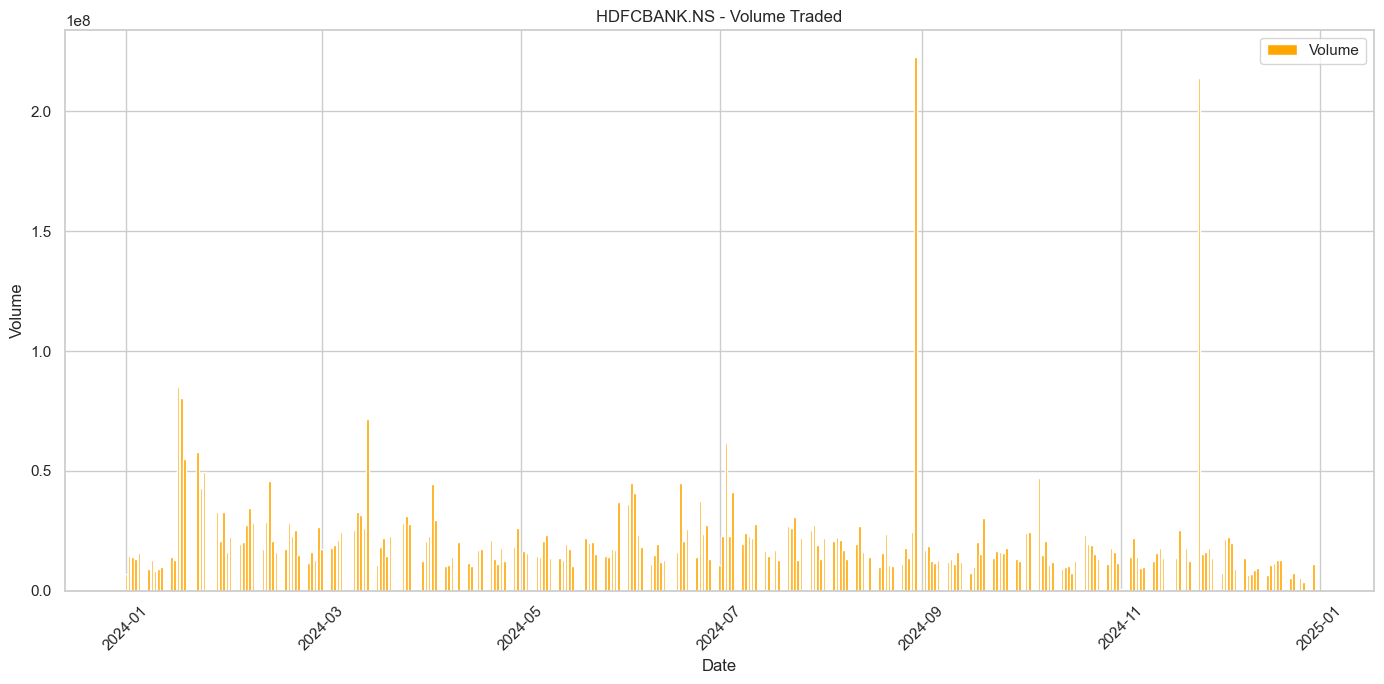

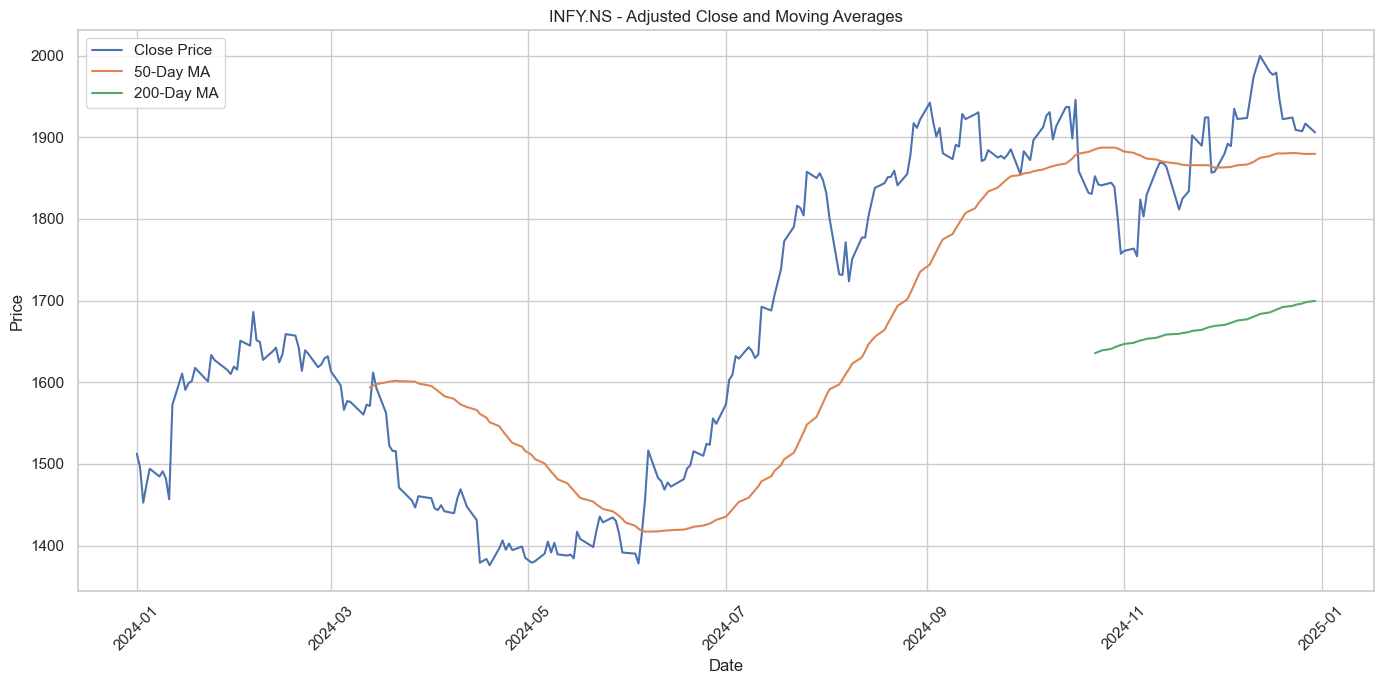

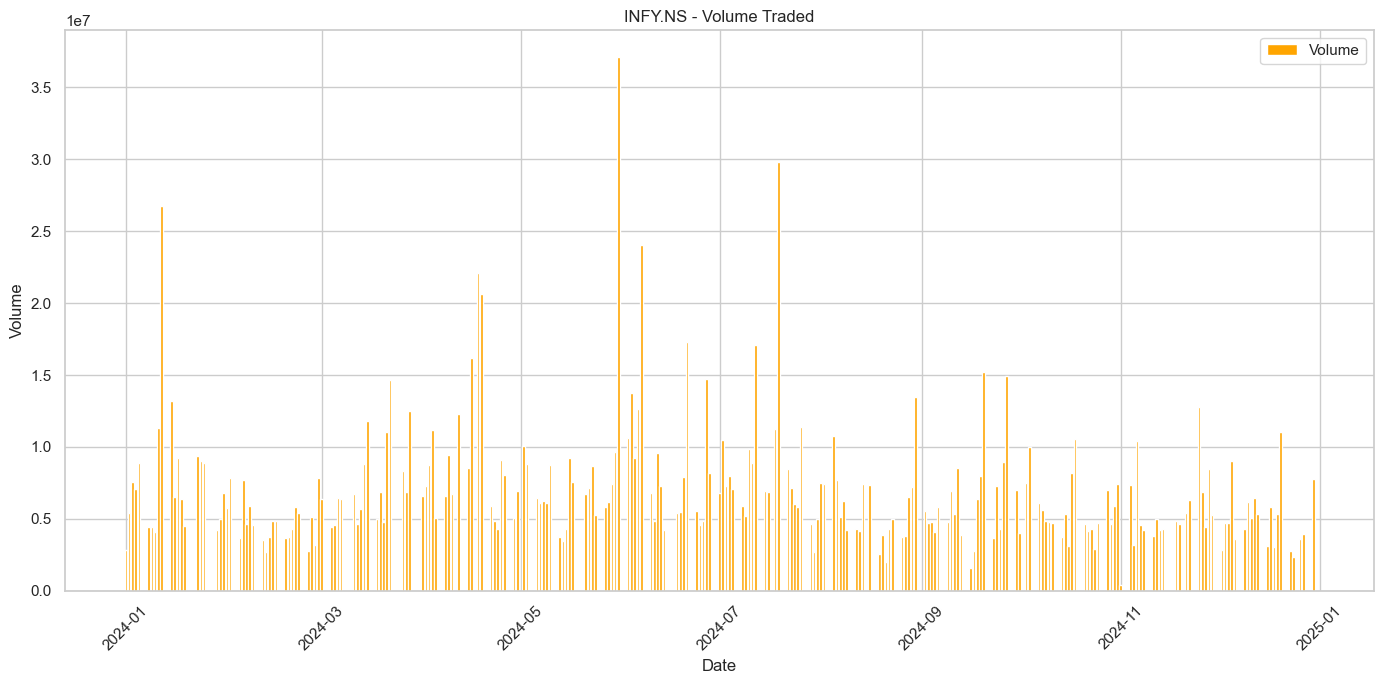

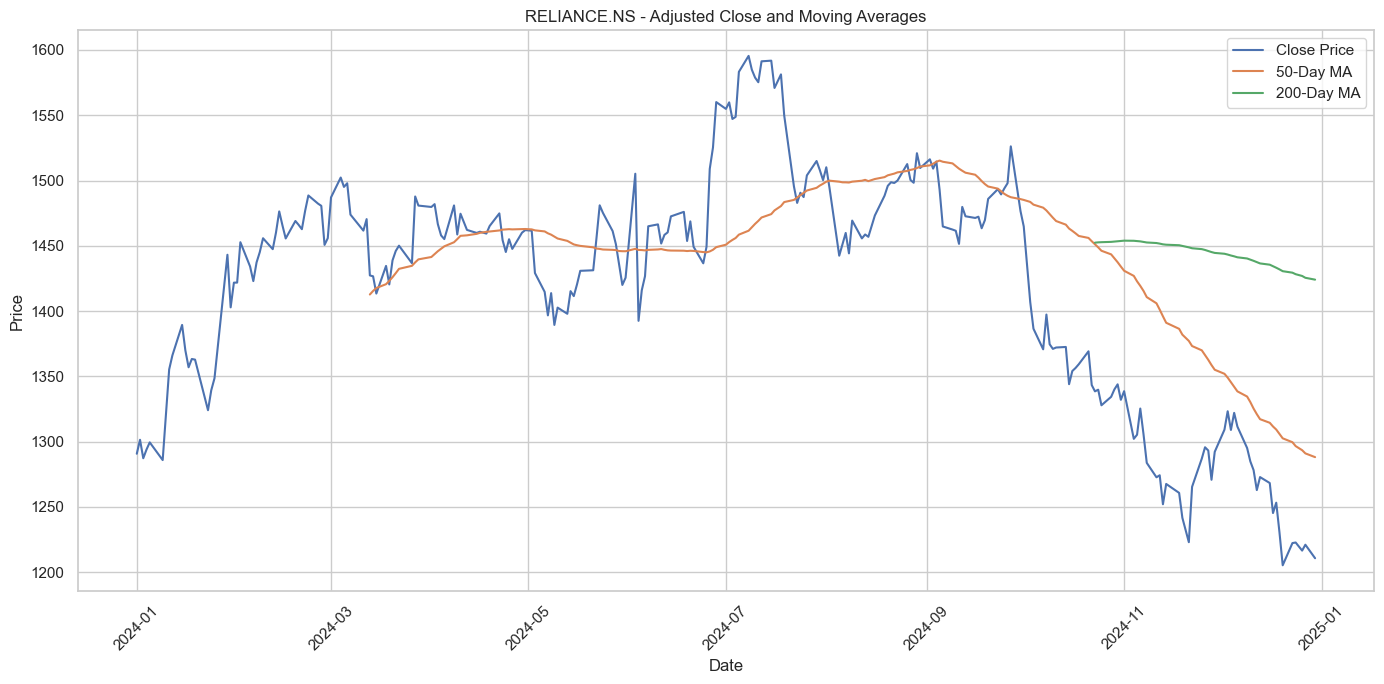

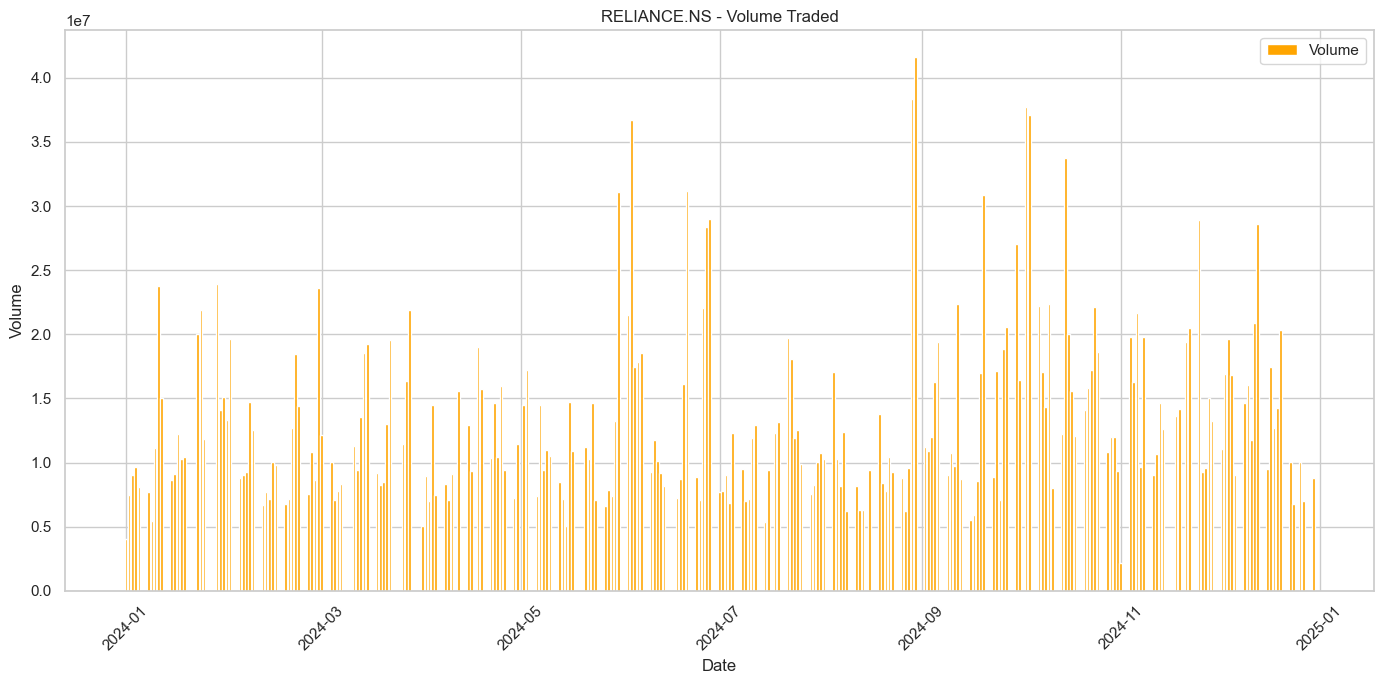

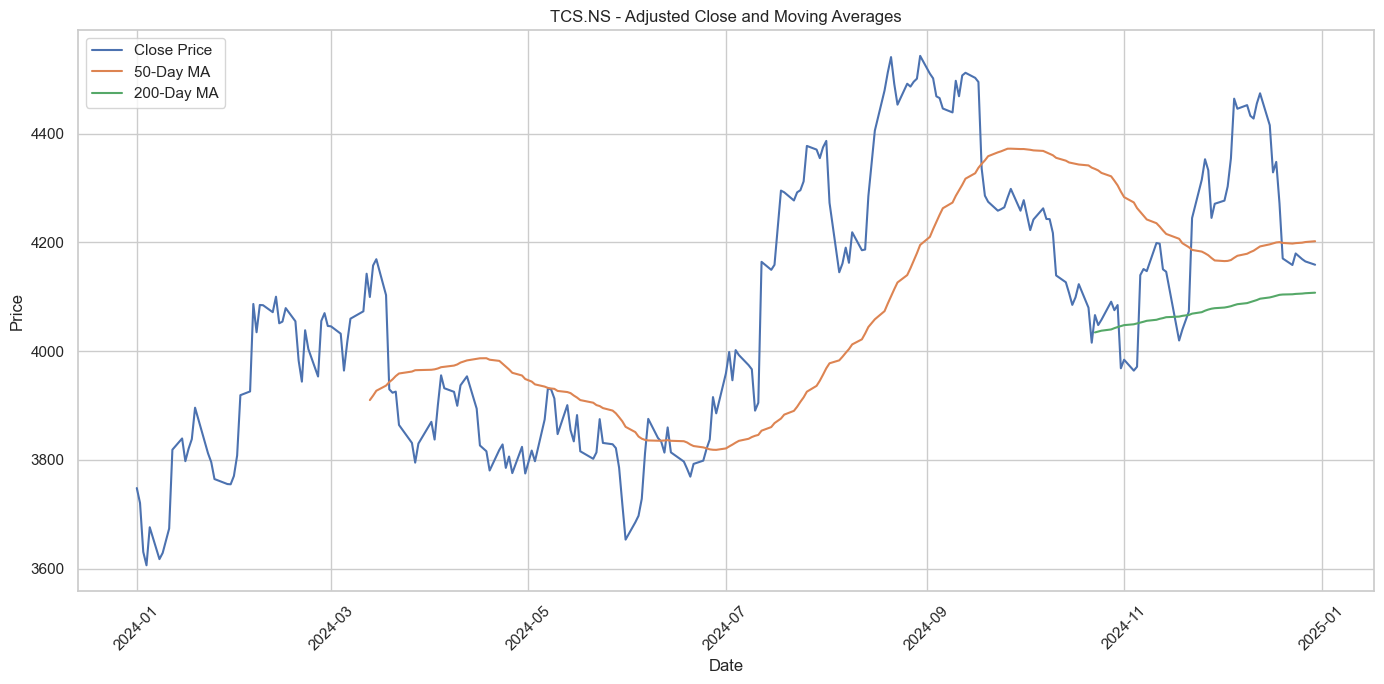

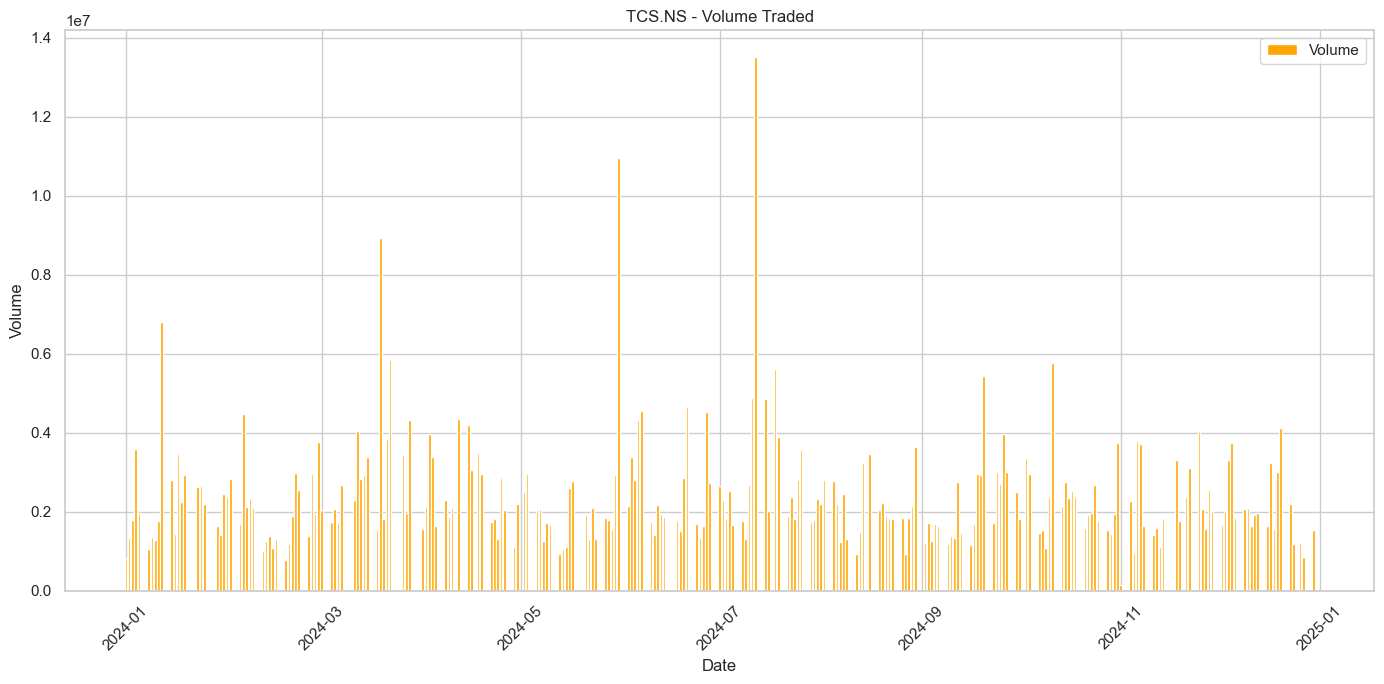

In [27]:
#  the 50-day and 200-day moving averages
short_window = 50
long_window = 200

unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Close'], label='Close Price')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

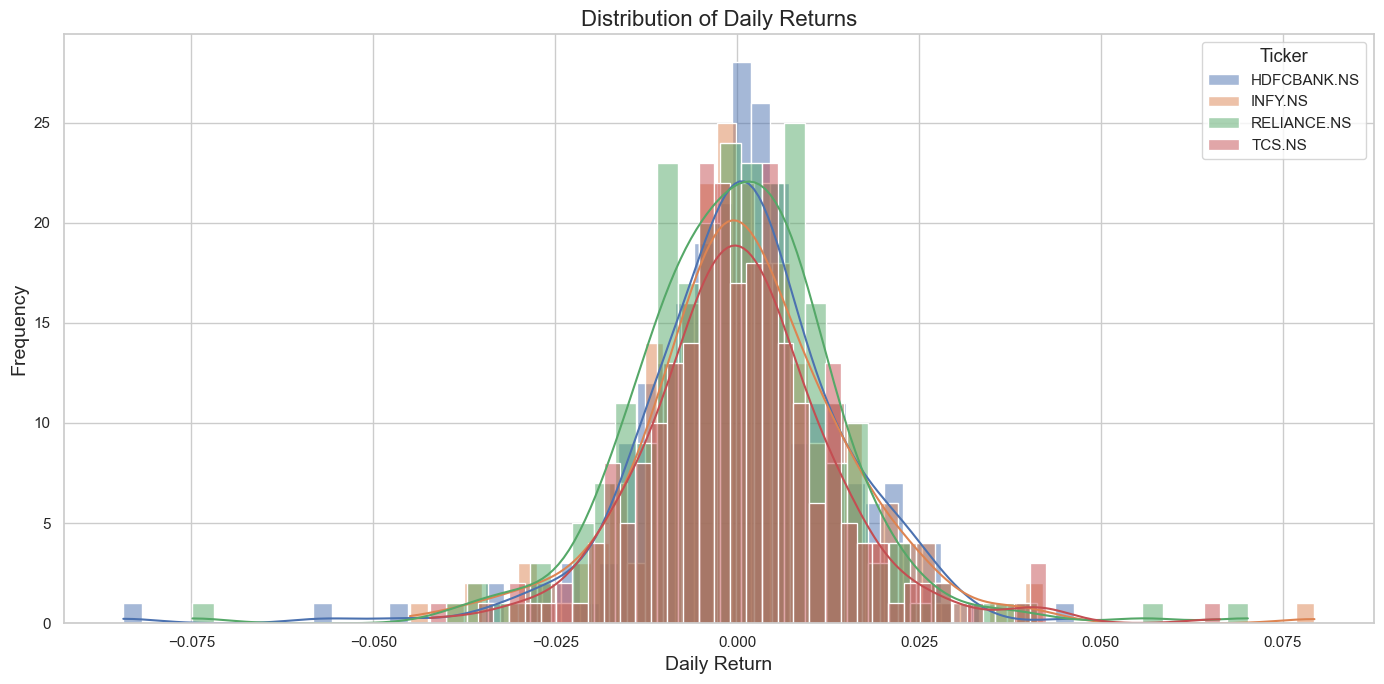

In [31]:
#Daily returns distribution
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()


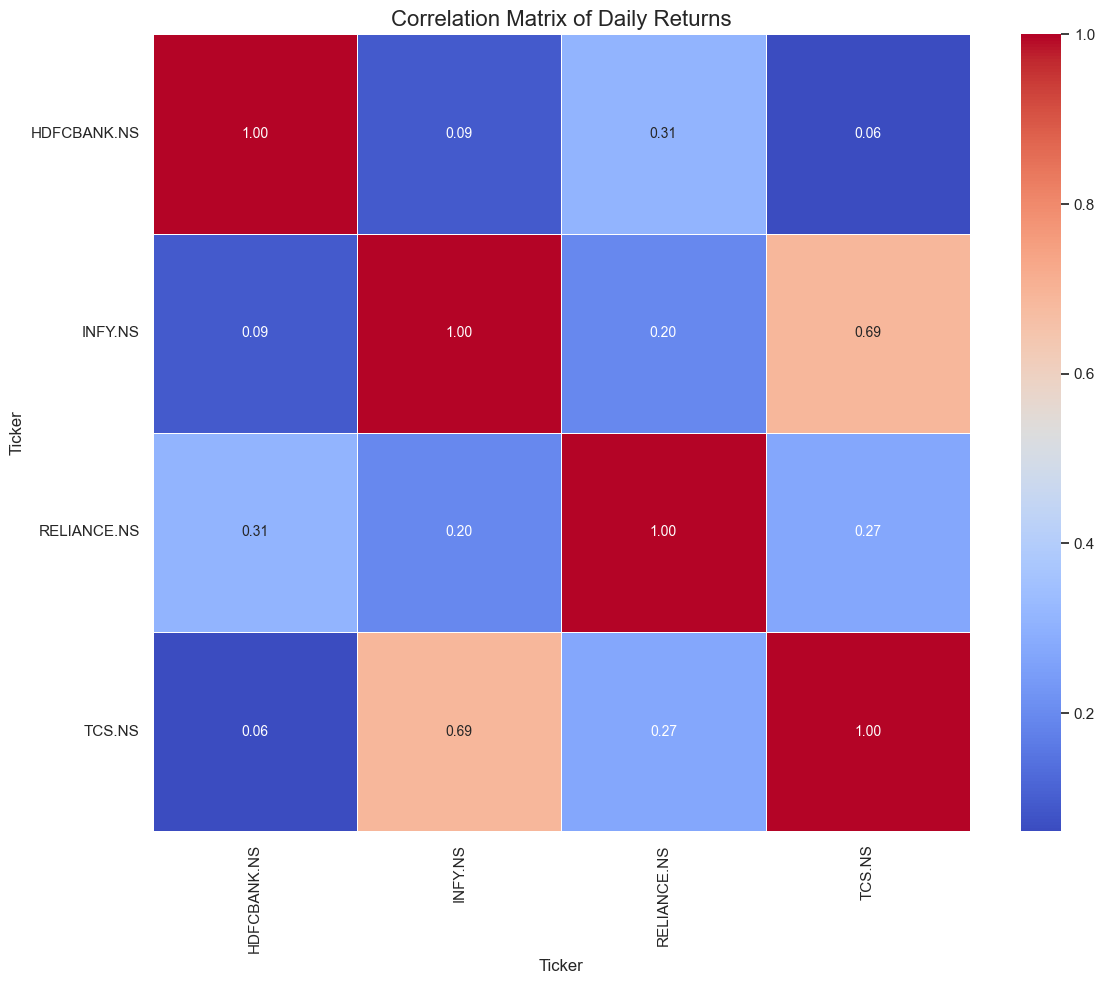

In [33]:
#Correlation on daily returns
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Portfolio Optimization 
Using Modren Portfolio Theory, balance the risk and returns

**Returns:**
Daily - Rt = (P(t) / P(t-1)) - 1

Annualize - E(R) = 1/N * (∑(Rt)) (average daily return);

E(Rannual) = E(Rdaily) * 252

**Risk:**
σ daily​ = sqrt(1/N−1 t=1∑N (Rt - R')^2)

​σ annual​ = σ daily * 15.8745 

In [34]:
expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility(risk)

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

In [35]:
stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.086811,0.224492
INFY.NS,0.265002,0.229103
RELIANCE.NS,-0.039788,0.229900
TCS.NS,0.129504,0.211524


**Inference:** 
1. INFY.NS has the highest return but comes with similar risk as other stocks like HDFCBANK.NS.
2. TCS.NS is a relatively safer option with decent returns.
3. RELIANCE.NS shows negative returns, so it might be less appealing unless it is expected to recover.

In [37]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

In [38]:
# Portfolios to simulate
num_portfolios = 10000

#Store the result
results = np.zeros((3, num_portfolios))

# Annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility 

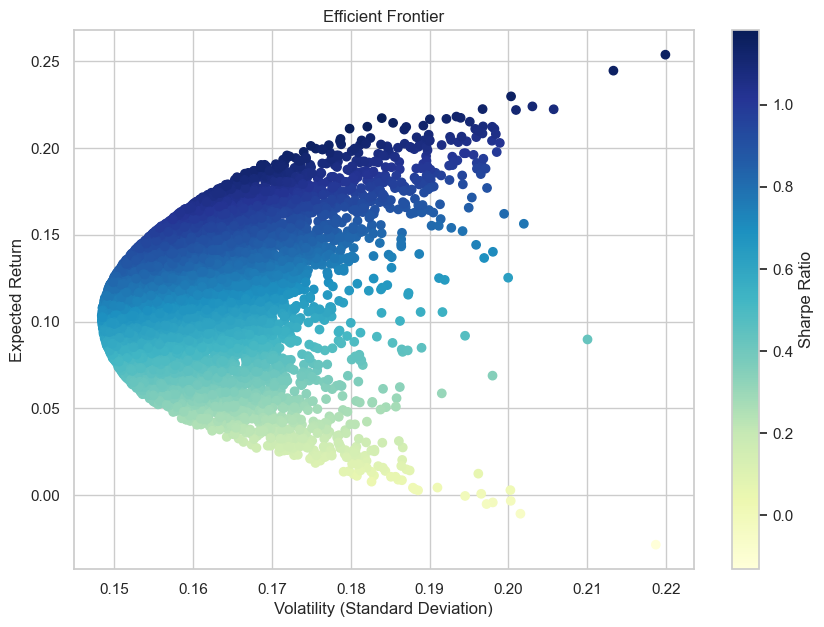

In [39]:
plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

In [40]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.21730721658952445, 0.1839342178728384, 1.181439859872937)

* Expected Return: 0.2173 (21.73%)
* Volatility: 0.1839 (18.39%)
* Sharpe Ratio: 1.1814

In [41]:
max_sharpe_weights = np.zeros(len(unique_tickers)) #Initialzie the weight vector

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix) #portfolio performance

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

In [42]:
portfolio_weights_df

,Ticker,Weight
0,HDFCBANK.NS,0.328762
1,INFY.NS,0.135164
2,RELIANCE.NS,0.183495
3,TCS.NS,0.352579


The optimal portfolio that maximizes the Sharpe ratio:

* HDFCBANK.NS: 32.88%
* INFY.NS: 13.52%
* RELIANCE.NS: 18.35%
* TCS.NS: 35.26%

This portfolio allocation gives the best trade-off between risk and return, as indicated by the Sharpe ratio of 1.1814.